#  Laboratorio 5

##### Gladys Andrea Rodríguez Guerrero  -  20006107

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
import joblib

### Selección de Variables

In [2]:
X_train = pd.read_csv("preprocess_data/prep_Xtrain.csv")
X_test = pd.read_csv("preprocess_data/prep_Xtest.csv")
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,1.0,0.560191,1.0,1.000000,0.0,1.0,0.0,0.0
1,0.5,0.0,0.308872,1.0,0.666667,0.0,1.0,0.0,1.0
2,0.0,0.0,0.365578,0.6,0.333333,0.0,1.0,0.0,0.0
3,0.0,1.0,0.120382,0.6,0.666667,0.0,1.0,0.0,0.0
4,0.0,1.0,0.195778,0.6,0.333333,0.0,1.0,0.0,0.5


In [3]:
y_train = pd.read_csv("preprocess_data/prep_ytrain.csv")
y_test = pd.read_csv("preprocess_data/prep_ytest.csv")

y_train.head()

,Survived
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [4]:
#objeto selector de variables
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [5]:
sel_.get_support().sum()

8

In [6]:
sel_.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True])

In [7]:
selected_features = X_train.columns[(sel_.get_support())]
selected_features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [8]:
pd.Series(selected_features).to_csv('preprocess_data/selected_features.csv', index=False)

### Entrenamiento del Modelo

In [9]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [10]:
# Creando el modelo

linear_model = Lasso(alpha=0.001, random_state=2022)

linear_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=2022)

### Predicción

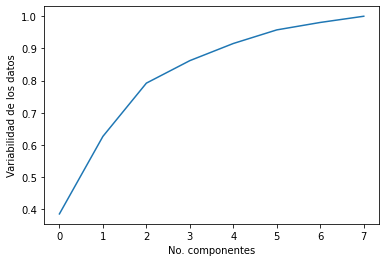

In [11]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components = sel_.get_support().sum()) 
pca.fit(X_train) # obtener los componentes principales
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
 
#graficamos el acumulado de variablidad en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. componentes')
plt.ylabel('Variabilidad de los datos')
plt.show()

In [12]:
# seleccion de componentes PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

###### * Train

In [13]:
preds_train = linear_model.predict(X_train)

In [14]:
#Resultados obtenidos del Train

print("MSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_train), np.exp(preds_train))))

print("RMSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_train), 
                                                           np.exp(preds_train), squared=False)))

print("R2 de Entrenamiento: {}".format(r2_score(np.exp(y_train), np.exp(preds_train))))

MSE de Entrenamiento: 0.40934915747458617
RMSE de Entrenamiento: 0.6398039992642951
R2 de Entrenamiento: 0.4133460666468032


###### * Test

In [15]:
preds_test = linear_model.predict(X_test)

In [16]:
#Resultados del Test
print("MSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_test), np.exp(preds_test))))

print("RMSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_test), 
                                                           np.exp(preds_test), squared=False)))

print("R2 de Entrenamiento: {}".format(r2_score(np.exp(y_test), np.exp(preds_test))))

MSE de Entrenamiento: 0.5914300479871853
RMSE de Entrenamiento: 0.769044893349657
R2 de Entrenamiento: 0.1564574551472815


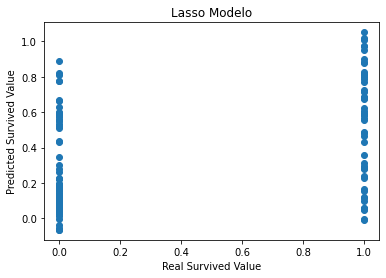

In [17]:
plt.scatter(y_test, preds_test)
plt.xlabel("Real Survived Value")
plt.ylabel("Predicted Survived Value")
plt.title("Lasso Modelo")
plt.show()

importance = pd.Series(np.abs(linear_model.coef_.ravel()))
importance.index = selected_features
importance.sort_values(inplace=True, ascending=False)

In [18]:
importance = pd.Series(np.abs(linear_model.coef_.ravel()))
importance.index = selected_features
importance.sort_values(inplace=True, ascending=False)

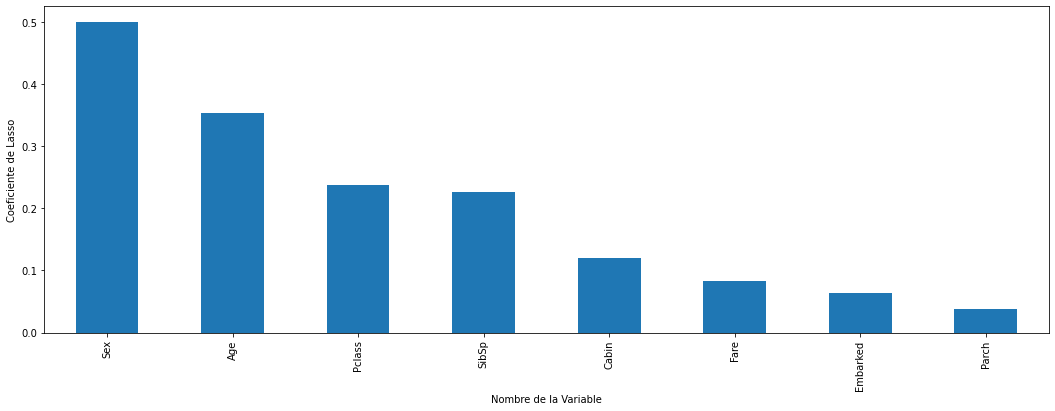

In [19]:
importance.plot.bar(figsize=(18, 6))
plt.ylabel("Coeficiente de Lasso")
plt.xlabel("Nombre de la Variable")
plt.show()

In [21]:
joblib.dump(linear_model, 'final_model/lasso_reg.joblib')

['final_model/lasso_reg.joblib']